As next steps you can expect an importer for BONSAI, get ODYM-RECC running and develop a modified version of EcoInvent with PREMISE.

In [ ]:
# please add your suggestions here regarding what should be learned about the tools out there

How do I include this analysis step? 

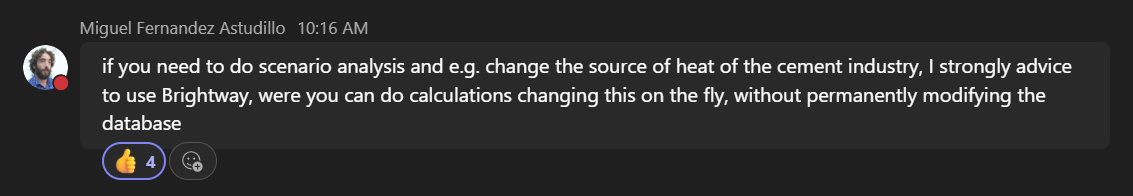

In [ ]:
# Copy the database
orig = Database("ecoinvent 3.9 cutoff")
new_db = Database("ecoinvent_scenario")
new_db.write(orig.load())  # shallow copy

# Modify one activity
market = new_db.get("market for electricity, medium voltage", "DE")

# Remove old technosphere inputs
for exc in list(market.technosphere()):
    exc.delete()

# Add new ones (example, you need to pick the right suppliers)
coal = new_db.get("electricity production, hard coal", "DE")
wind = new_db.get("electricity production, wind, onshore", "DE")
imported = new_db.get("market for electricity, medium voltage", "FR")

market.new_exchange(
    input=coal.key, type="technosphere", amount=0.3, unit="kilowatt hour"
).save()
market.new_exchange(
    input=wind.key, type="technosphere", amount=0.5, unit="kilowatt hour"
).save()
market.new_exchange(
    input=imported.key, type="technosphere", amount=0.2, unit="kilowatt hour"
).save()

market.save()